#Import Packages

In [2]:
"""Import basic modules."""
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns            
from scipy import stats          # For statistics

"""Plotly visualization."""
import plotly.graph_objs as go
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

"""Machine learning models."""
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier


"""Classification (evaluation) metrices."""
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score




#Read Data

In [5]:
"""Read and preview the train data from csv file."""
train = pd.read_csv(r"/content/Data/train.csv")
train.head(2)

"""Read and preview the test from csv file."""
test = pd.read_csv(r"/content/Data/test.csv")
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [7]:
merged = pd.concat([train, test], sort = False).reset_index(drop=True)
merged.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
def draw_plot(feature):
  plt.rcParams["figure.figsize"] = [7.50, 3.50]
  plt.rcParams["figure.autolayout"] = True

  fig, ax = plt.subplots()
  merged[feature].value_counts().plot(ax=ax, kind='bar', xlabel=feature, ylabel='frequency')

  plt.show()

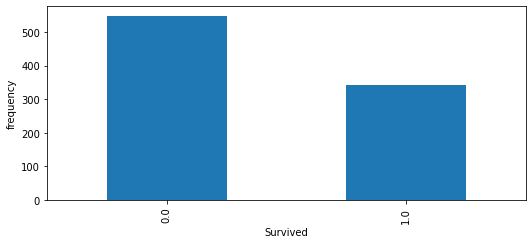

In [9]:
draw_plot('Survived')

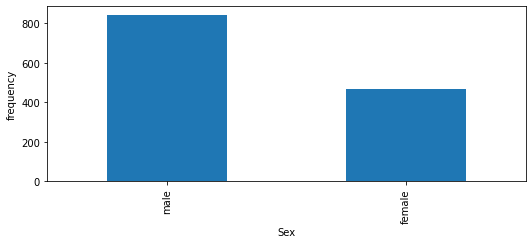

In [10]:
draw_plot('Sex')

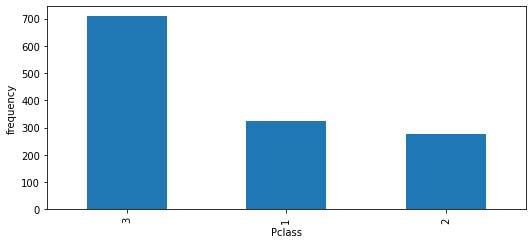

In [11]:
draw_plot('Pclass')

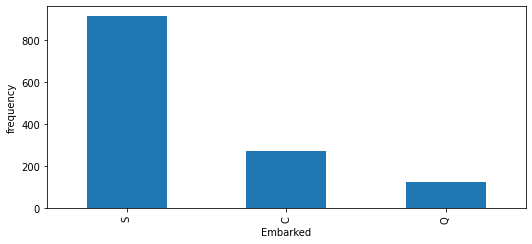

In [12]:
draw_plot('Embarked')

In [13]:
def plotHistogram(variable):
    """Plots histogram and density plot of a variable."""
    
    # Create subplot object.
    fig = make_subplots(
        rows=2,
        cols=1,
        print_grid=False,
    subplot_titles=(f"Distribution of {variable.name} with Histogram", f"Distribution of {variable.name} with Density Plot"))
    
    # This is a count histogram
    fig.add_trace(
        go.Histogram(
            x = variable,
            hoverinfo="x+y",
            marker = dict(color = "chocolate")
        ),
    row=1,col=1)
    
    # This is a density histogram
    fig.add_trace(
        go.Histogram(
            x = variable,
            hoverinfo="x+y",
            histnorm = "density",
            marker = dict(color = "darkred")
        ),
    row=2,col=1)
    
    # Update layout
    fig.layout.update(
        height=800, 
        width=870,
        hovermode="closest",
        showlegend=False,
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.yaxis1.update(title="<b>Abs Frequency</b>")
    fig.layout.yaxis2.update(title="<b>Density(%)</b>")
    fig.layout.xaxis2.update(title=f"<b>{variable.name}</b>")
    return fig.show()
    

    
'''#2.Calculate descriptive statistics.'''
def calculateSummaryStats(variable):
    stats = variable.describe()
    skewness = pd.Series(variable.skew(), index = ["skewness"])
    statsDf = pd.DataFrame(pd.concat([skewness, stats], sort = False), columns = [variable.name])
    statsDf = statsDf.reset_index().rename(columns={"index":"summaryStats"})
    return display(statsDf.round(2))

In [ ]:
plotHistogram(merged.Fare)

In [17]:
calculateSummaryStats(merged.Fare)

,summaryStats,Fare
0,skewness,4.37
1,count,1308.00
2,mean,33.30
3,std,51.76
4,min,0.00
5,25%,7.90
6,50%,14.45
7,75%,31.28
8,max,512.33


In [19]:
calculateSummaryStats(merged.Age)

,summaryStats,Age
0,skewness,0.41
1,count,1046.00
2,mean,29.88
3,std,14.41
4,min,0.17
5,25%,21.00
6,50%,28.00
7,75%,39.00
8,max,80.00


In [21]:
merged.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [30]:
df_sector=merged.groupby("Cabin")
df_sector["Cabin"].count()

Cabin
A10    1
A11    1
A14    1
A16    1
A18    1
      ..
F33    4
F38    1
F4     4
G6     5
T      1
Name: Cabin, Length: 186, dtype: int64

# Data Engineering

In [34]:
nanReplaced= merged.Cabin.fillna("X")
merged["cabinProcessed"] = nanReplaced.str.get(0) 


In [35]:
merged.groupby("cabinProcessed")["cabinProcessed"].count()


cabinProcessed
A      22
B      65
C      94
D      46
E      41
F      21
G       5
T       1
X    1014
Name: cabinProcessed, dtype: int64

In [36]:
firstName = merged.Name.str.split(".").str.get(0).str.split(",").str.get(-1)

In [37]:
firstName.value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: Name, dtype: int64

In [38]:
"""Create a bucket Officer and put Dr, Rev, Col, Major, Capt titles into it."""
firstName.replace(to_replace = ["Dr", "Rev", "Col", "Major", "Capt"], value = "Officer", inplace = True,regex=True)

"""Put Dona, Jonkheer, Countess, Sir, Lady, Don in bucket Aristocrat."""
firstName.replace(to_replace = ["Dona", "Jonkheer", "Countess", "Sir", "Lady", "Don"], value = "Aristocrat", inplace = True,regex=True)

"""Finally Replace Mlle and Ms with Miss. And Mme with Mrs."""
firstName.replace({"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"}, inplace = True,regex=True)

"""Replace the Aristocrat with Aristocrat"""
firstName.replace({"the Aristocrat":"Aristocrat"}, inplace = True,regex=True)

"""Insert a column named 'nameProcessed'."""
merged["nameProcessed"] = firstName

In [39]:
merged.nameProcessed.value_counts()

 Mr            757
 Miss          264
 Mrs           198
 Master         61
 Officer        23
 Aristocrat      6
Name: nameProcessed, dtype: int64

In [40]:
merged["familySize"] = merged.SibSp + merged.Parch + 1

In [41]:
merged.familySize.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: familySize, dtype: int64

In [42]:
"""Create buckets of single, small, medium, and large and then put respective values into them."""
merged.familySize.replace(to_replace = [1], value = "single", inplace = True)
merged.familySize.replace(to_replace = [2,3], value = "small", inplace = True)
merged.familySize.replace(to_replace = [4,5], value = "medium", inplace = True)
merged.familySize.replace(to_replace = [6, 7, 8, 11], value = "large", inplace = True)

In [43]:
otherwise = merged.Ticket.str.split(" ").str.get(0).str.get(0) # This extracts the 1st character
merged["ticketProcessed"] = np.where(merged.Ticket.str.isdigit(), "N", otherwise)

In [44]:
merged.ticketProcessed.value_counts()

N    957
P     98
S     98
C     77
A     42
W     19
F     13
L      5
Name: ticketProcessed, dtype: int64